<a href="https://colab.research.google.com/github/dariaAlium/DA/blob/master/Lab_1_Exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Майнор "Интеллектуальный анализ данных" </center>

# <center> Курс "Введение в анализ данных" </center>

# <center> Лабораторная работа №1. Обработка и первичный анализ данных </center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [0]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_colwidth', -1)

In [81]:
data = pd.read_csv("students_data.csv")
data.shape
data.head(50)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [5]:
sign = {'ID',	'Subject',	'school',	'sex',	'age',	'address',	'famsize',	
        'Pstatus',	'Medu',	'Fedu',	'Mjob',	'Fjob',	'reason',	'guardian',
        'traveltime',	'studytime',	'failures',	'schoolsup',	'famsup',	'paid',	
        'activities',	'nursery',	'higher',	'internet',	'romantic',	'famrel',	
        'freetime',	'goout',	'Dalc',	'Walc',	'health',	'absences',	'cheating',	'G1',	'G2',	'G3'}
signs = pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')
signs.head(40)

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


<br>  
## Задания

**NB:** Обратите внимание, что часть студентов посещают оба курса и представлены в данных два раза. Из-за этого некоторые результаты анализа могут быть искажены. Имеет смысл выявить таких студентов заранее ([Задание 10](#task10)) и учитывать эту информацию при анализе.

### Задание 1  
  
 * Для каждого признака определите, к какому типу он относится.   
 * Проверьте значения признаков на наличие опечаток и ошибок, исправьте их.<br>
   __Note:__ Исправлять ошибки нужно программно, модифицировать руками исходный файл нельзя.
 * При необходимости, приведите признак к определенному вами типу.

In [76]:
signs['defenitions'] = ['descrete', 'nominal', 'nominal', 
                       'nominal', 'descrete', 'nominal', 
                       'ordinal', 'nominal', 'ordinal', 
                       'ordinal', 'nominal', 'nominal',
                        'nominal', 'nominal', 'ordinal', 
                        'ordinal',
                       'ordinal',	'binary' , 'binary',
                        'binary', 'binary',	'binary',
                        'binary',	'binary', 'binary',
                        'ordinal',	'ordinal',	'ordinal',
                        'ordinal',	'ordinal',	'ordinal',
                        'descrete',	'binary', 'ordinal',
                        'ordinal',	'ordinal']
priznaky = signs['Признак'].values.tolist()
opisanie =  signs['defenitions'].values.tolist()


print(priznaky)
signs.head(40) 

['ID', 'Subject', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'cheating', 'G1', 'G2', 'G3']


,Признак,Описание,defenitions
0,ID,Уникальный номер наблюдения,descrete
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык",nominal
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira",nominal
3,sex,"Пол студента: 'F' - женский, 'M' - мужской",nominal
4,age,Возраст студента,descrete
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом",nominal
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3",ordinal
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно",nominal
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование",ordinal
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование",ordinal


In [0]:

def find_mistales(tmp, v1, top):
    for j in range(len(tmp)):
        if  tmp[j] not in v1:
            tmp[j] = top
    return tmp

def check_mistakes():
    for i in range(len(priznaky)):
        tmp = data[priznaky[i]].values.tolist()

        if opisanie[i] == 'binary':
            data[priznaky[i]] = pd.DataFrame(find_mistales(tmp, {'yes', 'no'}, 'no'))

        if opisanie[i] == 'descrete':
            for j in range(len(tmp)):
                if not str(tmp[j]).isdigit():
                    tmp[j] = NaN
            data[priznaky[i]] = pd.DataFrame(tmp)

        if priznaky[i] == 'Subject':
            data[priznaky[i]] = pd.DataFrame(pd.DataFrame(find_mistales(tmp, {'Por', 'Math'}, data[priznaky[i]].describe()[2])))

        if priznaky[i] == 'school':
            data[priznaky[i]] = pd.DataFrame(find_mistales(tmp, {'GP', 'MS'}, data[priznaky[i]].describe()[2]))

        if priznaky[i] == 'sex':
            tmp = find_mistales(tmp, {'F', 'M'}, data[priznaky[i]].describe()[2])
            for j in range(len(tmp)):
                if tmp[j] == 'm':
                    tmp[j] = 'M'
            data[priznaky[i]] = pd.DataFrame(tmp)

        if priznaky[i] == 'address':
            data[priznaky[i]] = pd.DataFrame(find_mistales(tmp, {'U', 'R'}, data[priznaky[i]].describe()[2]))

        if priznaky[i] == 'famsize':
            data[priznaky[i]] = pd.DataFrame(find_mistales(tmp, {'GT3', 'LE3'}, data[priznaky[i]].describe()[2]))

        if priznaky[i] == 'Pstatus':
            data[priznaky[i]] = pd.DataFrame(find_mistales(tmp, {'A', 'T'}, data[priznaky[i]].describe()[2]))

        if priznaky[i] == 'guardian':
            data[priznaky[i]] = pd.DataFrame(find_mistales(tmp, {'father', 'mother'}, data[priznaky[i]].describe()[2]))

        if priznaky[i] == 'Medu':
            data[priznaky[i]] = pd.DataFrame(find_mistales(tmp, {'1', '2', '3', '4'}, data[priznaky[i]].describe()[2]))

        if priznaky[i] == 'Fedu':
            data[priznaky[i]] = pd.DataFrame(find_mistales(tmp, {'1', '2', '3', '4'}, data[priznaky[i]].describe()[2]))

check_mistakes()


### Задание 2  
  
Проверьте, присутствуют ли в данных пропущенные значения. Сколько? В каких признаках?  
По каждому такому признаку предложите и обоснуйте, что делать с пропущенными значениями.

In [0]:
def count_NaN():
    count = {}
    for i in priznaky:
        tmp = data[i].values.tolist()
        c = 0
        for j in range(len(tmp)):
            if tmp[j] == 'NaN':
                c+=1
        count[i] = c
    return count

'''
в большинстве случаев пропущенное или ошибочное значение заменяется на самое популярное
'''

### Задание 3  
  
* Посчитайте описательные статистики для числовых и для категориальных признаков. 
* Сколько студентов посещают каждую из школ?  
* Сколько студентов посещают математику, сколько - португальский?  
* Студенты какого курса чаще заваливают экзамены?  
* Сколько в среднем времени в неделю уходит на учебу по каждому предмету?  
* На что чаще обращают внимание при выборе школы?

In [9]:
print(data['school'].value_counts())
print(data['Subject'].value_counts())
print('In Por', pd.DataFrame(data.loc[(data['Subject'] == 'Por') & (data['failures'] > 0)])['ID'].count())
print('In Math', pd.DataFrame(data.loc[(data['Subject'] == 'Math') & (data['failures'] > 0)])['ID'].count())
print('Время на учебу por:', pd.DataFrame(data.loc[(data['Subject'] == 'Por')])['studytime'].mean())
print('Время на учебу math:', pd.DataFrame(data.loc[(data['Subject'] == 'Math')])['studytime'].mean())
print('частая причина:', data['reason'].describe().to_list()[2])

GP    772
MS    272
Name: school, dtype: int64
Por     649
Math    395
Name: Subject, dtype: int64
In Por 100
In Math 83
Время на учебу por: 1.9306625577812018
Время на учебу math: 2.0354430379746837
частая причина: course


### Задание 4  
  
Оцените распределение оценок (отдельно для `G1`, `G2` и `G3`). Сравните распределения для разных предметов - математики и португальского языка. Сделайте выводы.  
  
**Tip:** Для выполнения задания пригодятся графики плотности, гистограммы и боксплоты.

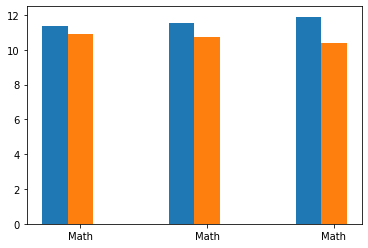

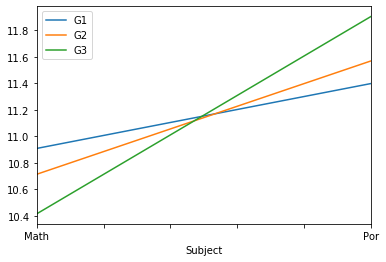

In [57]:

x = [pd.DataFrame(data.loc[(data['Subject'] == 'Por')]['G1']).mean(),
      pd.DataFrame(data.loc[(data['Subject'] == 'Por')])['G2'].mean(),
      pd.DataFrame(data.loc[(data['Subject'] == 'Por')])['G3'].mean()]
y = [pd.DataFrame(data.loc[(data['Subject'] == 'Math')])['G1'].mean(),
      pd.DataFrame(data.loc[(data['Subject'] == 'Math')])['G2'].mean(),
      pd.DataFrame(data.loc[(data['Subject'] == 'Math')])['G3'].mean()]
plt.bar([1.9, 2.9, 3.9], x, width=0.2)
plt.bar([2.1, 3.1, 4.1], y, width=0.2, tick_label='Math')
plt.show()

df = data[['G1'] + ['G2'] + ['G3'] +  ['Subject']]
df.groupby('Subject').mean().plot()

### Задание 5  
  
Оцените попарные зависимости числовых признаков.  
Рассчитайте и провизуализируйте матрицу корреляций. Дайте содержательный комментарий.

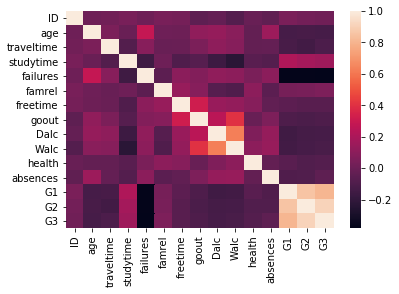

In [59]:
corr = data.corr() 
sb.heatmap(corr, xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values) 


'''
содержательный комментарий:
Как можно заметить, наибольшую кореляцию имеют между собой оценки за полугодия,
что было ожидаемо, так как ученики в большинстве случаев имеют равномерное 
распределение оценок

на оценки так же больше всего влияет время, потраченное на обучение, о чем нам 
говорит коэфициент корреляции равный 0.3

отрицательную корреляцию с оценками за полугодие имеет показатель заваленных 
предметов в прошлом, что так же было ожидаемо, ведь чем меньше заваленных 
предметов в прошлом, тем выше вероятность получить высокую оценку в настоящем

на данную графу (failures) наибольшее влияние оказывает возраст студентов, 
а наименьшее время, потраченное на учебу

получается что на оценки влияют failures & studytime, но studytime не влияет на 
failures
'''

### Задание 6  
  
Оцените попарные зависимости нечисловых (категориальных) признаков, дайте содержательный комментарий. 

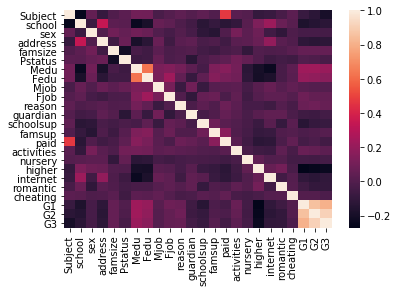

In [107]:
data_describe = data.describe(include=[object])
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
#print(categorical_columns)
non_data = pd.DataFrame(data[categorical_columns])
non_data['Fedu'] = non_data.Fedu.astype('int64')
non_data['Medu'] = non_data.Medu.astype('int64')
categorical_columns.remove('Medu')
categorical_columns.remove('Fedu')
for c in categorical_columns:
  q = range(1, 1 + non_data[c].describe(include=[object])['unique'])
  unique = dict(zip(non_data[c].unique(), q))
  tmp = non_data[c].values.tolist()
  for i in range(len(tmp)):
    tmp[i] = unique[tmp[i]]
  non_data[c] = pd.DataFrame(tmp)
non_data['G1'] = data['G1']
non_data['G2'] = data['G2']
non_data['G3'] = data['G3']
corr = non_data.corr()
sb.heatmap(corr, xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values)

'''

### Задание  7  
  
* Оцените, есть ли разница в употреблении алкоголя между парнями и девушками. Кто пьет больше?
* Оцените связь употребления алкоголя с признаками: address, Pstatus, higher, romantic, freetime. 
* Оцените связь употребления алкоголя с уровнем образования опекуна (для случаев, где это известно).
* Сравните употребление алкоголя для 50 лучших учеников и 50 худших (по `G3`). Выполните сравнение отдельно для каждого предмета (`Math` и `Por`). Дайте содержательный комментарий.  
  
**Tip:** для выполнения задания пригодятся боксплоты и гистограммы. 

In [0]:
# your code here

### Задание 8     
  
Оцените зависимость итоговой оценки от следующих признаков: 
  
* Пола
* Времени в пути от дома до школы
* Наличия дополнительной помощи в учебе (от членов семьи или вообще)
* Посещения платных дополнительных занятий
* Наличия интернета
* Наличия романтических отношений
* Употребления алкоголя  

In [0]:
# your code here

### Задание 9  
  
Добавьте в данные новый признак - итоговая оценка по 4-х балльной шкале:  

* Отлично: 18 <= `G3` <= 20
* Хорошо: 14 <= `G3` <= 17
* Удовлетворительно: 8 <= `G3` <= 13
* Неудовлетворительно: `G3` < 8  
  
Оцените распределение нового признака в зависимости от признака `reason` (причина выбора школы). Дайте содержательный комментарий. 

In [0]:
# your code here

### Задание  10 <a id="task10"></a>  
  
Часть из представленных в данных студентов посещали оба курса - `Math` и `Por`.  
* Предложите способ идентификации студентов и определите тех, кто посещал оба курса. Сколько таких студентов?  
* Для этих студентов сравните оценки по двум предметам, дайте комментарий.  
  
**Note:** Столбец `ID` является уникальным идентификатором наблюдения, но не студента. Он будет уникален для каждой строки.

In [0]:
# your code here

### Задание 11  
  
Предложите простую модель для определения (предсказания) итоговой оценки студента по 4-х балльной системе. Оцените точность предложенной модели. 

In [0]:
# your code here

### Задание * (бонусное)  
  
Дополнительное исследование данных и выводы положительно скажутся на оценке. 

In [0]:
# your code here